In [142]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [143]:
def all_points_minimize(fun, x0, method, jac=None, hess=None, tol=1e-6):
    path = []
    def callback(xk):
        path.append(np.copy(xk))

    result = minimize(fun, x0, method=method, jac=jac, hess=hess,
                      tol=tol, callback=callback)
    path = np.array(path)
    return result, path

def grid_minima(fun, bounds=[-5,5,-5,5], steps=200, tol=1e-2):
    x = np.linspace(bounds[0], bounds[1], steps)
    y = np.linspace(bounds[2], bounds[3], steps)
    X, Y = np.meshgrid(x, y)
    Z = np.array([fun([xx, yy]) for xx, yy in zip(X.ravel(), Y.ravel())])
    Z = Z.reshape(X.shape)

    minima = []
    for i in range(1, steps-1):
        for j in range(1, steps-1):
            val = Z[i,j]
            neighbors = Z[i-1:i+2, j-1:j+2].ravel()
            if val == neighbors.min():
                if not any(np.linalg.norm(np.array([X[i,j], Y[i,j]])-m) < tol for m in minima):
                    minima.append([X[i,j], Y[i,j]])
    return np.array(minima), X, Y, Z

def visualize_methods(fun, x0, methods, title, bounds, levels=50, show_minima=True):
    minima, X, Y, Z = grid_minima(fun, bounds=bounds)

    plt.figure(figsize=(7, 6))
    plt.contour(X, Y, Z, levels=levels, cmap="viridis")

    for method, opts in methods.items():
        res, path = all_points_minimize(fun, x0, method, **opts)
        if len(path) > 0:
            plt.plot(path[:,0], path[:,1], "o-", label=f"{method} (it={res.nit})")

    if show_minima and len(minima) > 0:
        plt.scatter(minima[:,0], minima[:,1], c="red", marker="x", s=150, label="Grid minima")

    plt.legend()
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

def visualize_minima(fun, title, bounds, levels=50):
    minima, X, Y, Z = grid_minima(fun, bounds=bounds)
    plt.figure(figsize=(7, 6))
    plt.contour(X, Y, Z, levels=levels, cmap="viridis")
    if len(minima) > 0:
        plt.scatter(minima[:,0], minima[:,1], c="red", marker="x", s=150, label="Grid minima")
    plt.legend()
    plt.title(title + " (Grid Minima)")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

### Задача 1: Минимизация сфероидальной функции

Функция:
$$
f(x) = \sum_{i=1}^{n} x_i^2
$$
Глобальный минимум в точке $x^* = (0, 0, \ldots, 0)$ со значением $f(x^*) = 0$.

Для сфероидальной функции $f(x, y) = x^2 + y^2$ строится поверхность и отмечается точка минимума (0, 0).

In [144]:
def sphere(x):
    return x[0]**2 + x[1]**2

In [145]:
methods_sphere = {
    "Nelder-Mead": {},
    "CG": {"jac": lambda x: np.array([2*x[0], 2*x[1]])},
    "Newton-CG": {"jac": lambda x: 2*x, "hess": lambda x: 2*np.eye(2)}
}

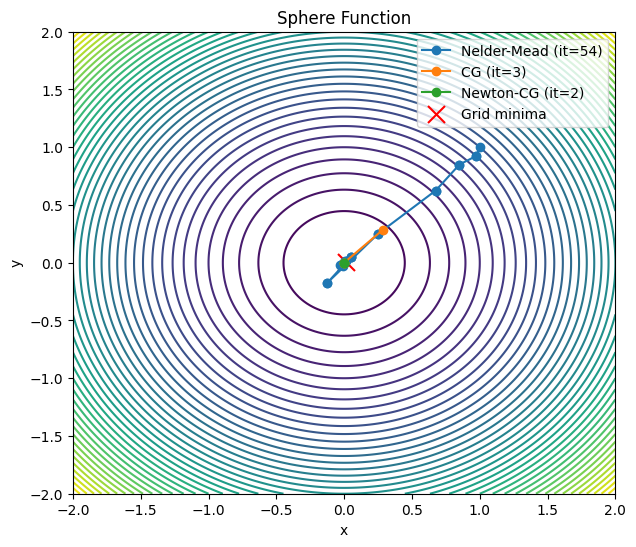

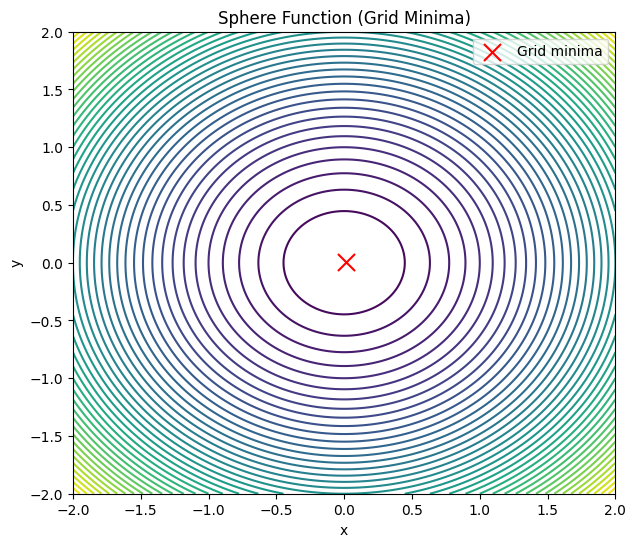

In [146]:
visualize_methods(sphere, [1, 1], methods_sphere, "Sphere Function", bounds=[-2,2,-2,2])
visualize_minima(sphere, "Sphere Function", bounds=[-2,2,-2,2])

### 2\. Функция Розенброка

Для функции Розенброка $f(x, y) = 100(y - x^2)^2 + (1 - x)^2$ строится поверхность и отмечается точка минимума (1, 1).

In [147]:
def rosenbrock(x):
    return 100*(x[1] - x[0]**2)**2 + (1 - x[0])**2

In [148]:
methods_rosen = {
    "Nelder-Mead": {},
    "CG": {"jac": lambda x: np.array([
        -400*x[0]*(x[1]-x[0]**2) - 2*(1-x[0]),
         200*(x[1]-x[0]**2)
    ])},
    "BFGS": {"jac": lambda x: np.array([
        -400*x[0]*(x[1]-x[0]**2) - 2*(1-x[0]),
         200*(x[1]-x[0]**2)
    ])}
}

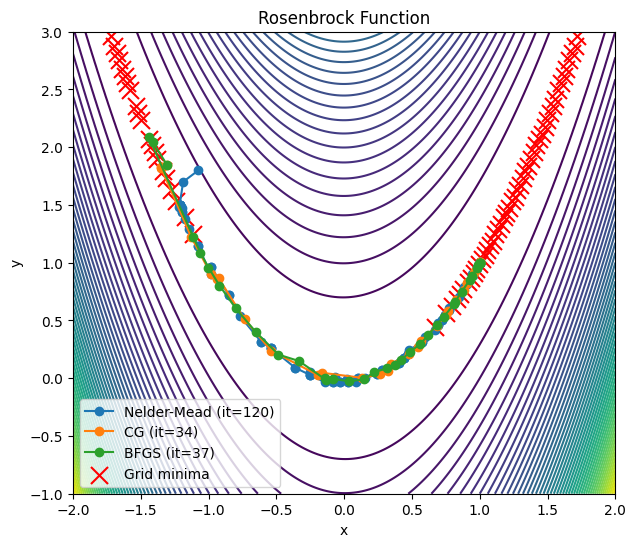

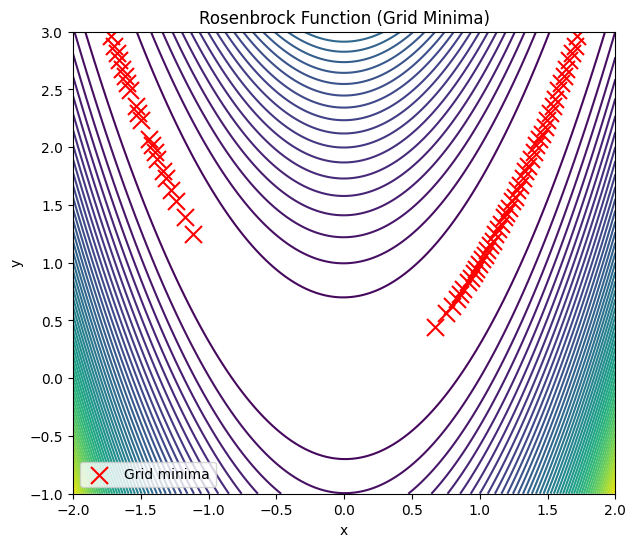

In [149]:
visualize_methods(rosenbrock, [-1, 2], methods_rosen, "Rosenbrock Function", bounds=[-2,2,-1,3])
visualize_minima(rosenbrock, "Rosenbrock Function", bounds=[-2,2,-1,3])

### 3\. Функция Химмельблау

Для функции Химмельблау $f(x, y) = (x^2 + y - 11)^2 + (x + y^2 - 7)^2$ строится поверхность и отмечаются четыре точки минимума.

In [150]:
def himmelblau(x):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

In [151]:
methods_himmel = {
    "Nelder-Mead": {},
    "BFGS": {"jac": lambda x: np.array([
        4*x[0]*(x[0]**2 + x[1] - 11) + 2*(x[0] + x[1]**2 - 7),
        2*(x[0]**2 + x[1] - 11) + 4*x[1]*(x[0] + x[1]**2 - 7)
    ])}
}

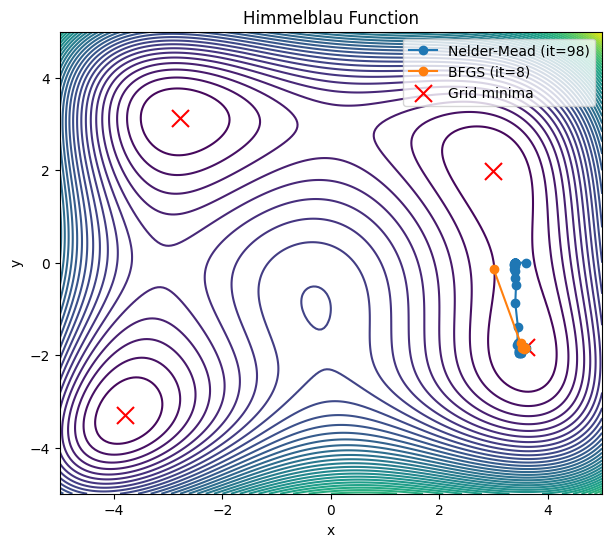

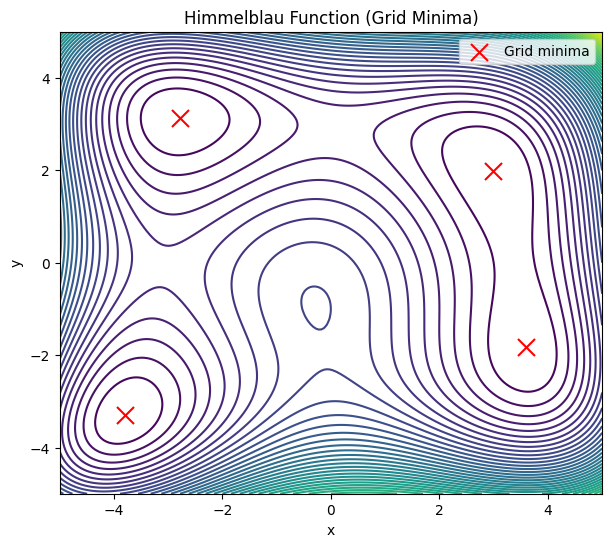

In [152]:
visualize_methods(himmelblau, [4, 0], methods_himmel, "Himmelblau Function", bounds=[-5,5,-5,5])
visualize_minima(himmelblau, "Himmelblau Function", bounds=[-5,5,-5,5])